## Question 1 part 3

In [ ]:
#import library
import numpy as np
import itertools

In [ ]:
#define muculloch pitts
class McCulloch_Pitts_neuron():

  def __init__(self , weights , threshold):
    self.weights = weights    #define weights
    self.threshold = threshold    #define threshold

  def model(self , x):
    #define model with threshold
    if self.weights @ x >= self.threshold:
        return 1
    else:
        return 0

In [ ]:
#define model for dataset
def Area(x, y):
  neur1 = McCulloch_Pitts_neuron([2, -1], 2)
  neur2 = McCulloch_Pitts_neuron([-2, -1], -6)
  neur3 = McCulloch_Pitts_neuron([0, 1], 0)
  neur4 = McCulloch_Pitts_neuron([1, 1, 1], 3)

  z1 = neur1.model(np.array([x, y]))
  z2 = neur2.model(np.array([x, y]))
  z3 = neur3.model(np.array([x, y]))
  z4 = neur4.model(np.array([z1, z2, z3]))


  return list([z4])


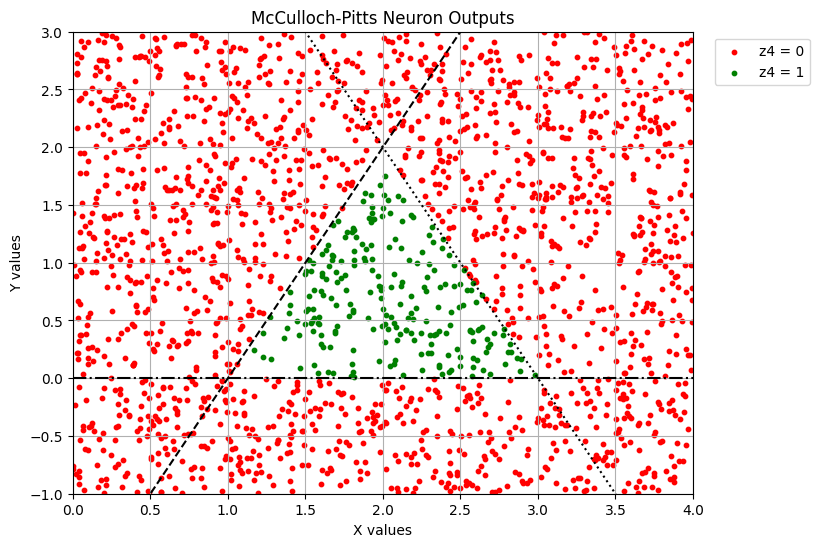

In [ ]:
import matplotlib.pyplot as plt

# Generate random data points
num_points = 2000
x_values = np.random.uniform(0, 4, num_points)  # Updated x-axis limits
y_values = np.random.uniform(-1, 3, num_points)  # Updated y-axis limits

# Initialize lists to store data points for different z5 values
red_points = []
green_points = []

# Evaluate data points using the Area function
for i in range(num_points):
    z4_value = Area(x_values[i], y_values[i])
    if z4_value == [0]:  # z5 value is 0
        red_points.append((x_values[i], y_values[i]))
    else:  # z5 value is 1
        green_points.append((x_values[i], y_values[i]))

# Separate x and y values for red and green points
red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='z4 = 0', s=10)
plt.scatter(green_x, green_y, color='green', label='z4 = 1', s=10)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs')

x = np.linspace(-1, 4, 10)
y1=2*x-2
y2=-2*x+6

# Plotting lines with legends
#plt.axvline(y=2*x-2, color='black', linestyle='--', label='x = 1')
#plt.axvline(x=2, color='black', linestyle='-.', label='x = 2')
#plt.axhline(y=0.5, color='black', linestyle=':', label='y = 0.5')
plt.plot(x, y1, color='black', linestyle='--')
plt.plot(x, y2, color='black', linestyle=':')
plt.axhline(y=0, color='black', linestyle='-.')

plt.grid(True)

# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

# Save plot as PDF
plt.savefig('c.png', bbox_inches='tight')

plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


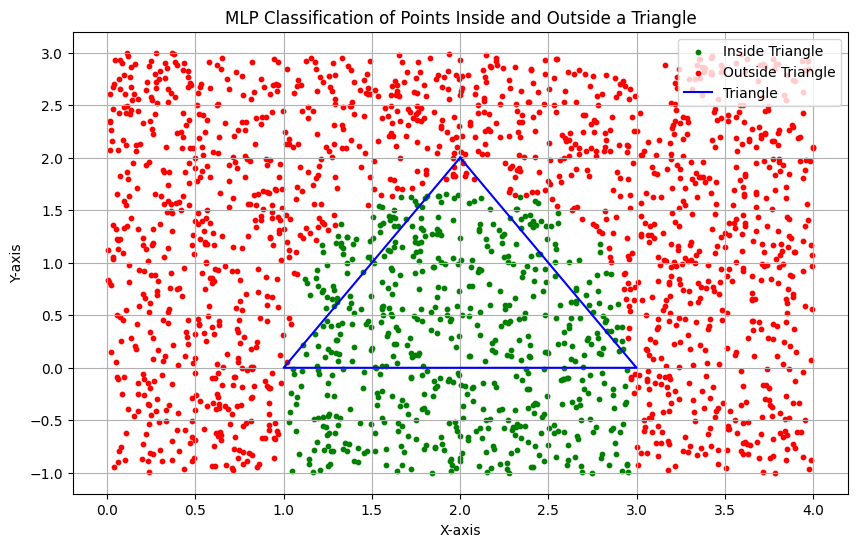

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the MLP model
def create_custom_mlp():
    model = Sequential()

    # First hidden layer with 3 neurons
    model.add(Dense(3, input_dim=2, activation='sigmoid', use_bias=True))

    # Output layer with 1 neuron
    model.add(Dense(1, activation='sigmoid', use_bias=True))

    return model

# Create the model
model = create_custom_mlp()

# Manually set weights and biases for the first hidden layer
# Each row corresponds to a neuron, and each column corresponds to an input
weights_hidden = np.array([
    [2, -1],   # Line AB (example coefficients)
    [-2, -1],  # Line BC (example coefficients)
    [0, 1]    # Line CA (example coefficients)
])

biases_hidden = np.array([-2, +6, 0])  # Adjust as per triangle side equations

# Ensure the weights and biases match the expected format
model.layers[0].set_weights([weights_hidden.T, biases_hidden])

# Manually set weights and biases for the output layer
# Ensure all neurons in the hidden layer must output > 0 for the final neuron to activate
weights_output = np.array([[1], [1], [1]])  # All hidden neurons contribute positively
biases_output = np.array([-2])  # Adjust threshold so all 3 neurons must fire to classify as inside

model.layers[1].set_weights([weights_output, biases_output])

# Test the model with randomly generated points
# Generate random data points
num_points = 2000
x_values = np.random.uniform(0, 4, num_points)  # Updated x-axis limits
y_values = np.random.uniform(-1, 3, num_points)  # Updated y-axis limits

x_test = np.column_stack((x_values, y_values))

# Predict using the model
predictions = model.predict(x_test)

# Classify points as inside or outside
inside_triangle = x_test[predictions.flatten() >= 0.5]
outside_triangle = x_test[predictions.flatten() < 0.5]

# Plot the classified points and the triangle
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot inside points
plt.scatter(inside_triangle[:, 0], inside_triangle[:, 1], color='green', label='Inside Triangle', s=10)

# Plot outside points
plt.scatter(outside_triangle[:, 0], outside_triangle[:, 1], color='red', label='Outside Triangle', s=10)

# Plot triangle edges
triangle_vertices = np.array([[2, 2], [3, 0], [1, 0], [2, 2]])
plt.plot(triangle_vertices[:, 0], triangle_vertices[:, 1], color='blue', label='Triangle')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('MLP Classification of Points Inside and Outside a Triangle')
plt.legend()
plt.grid()
plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


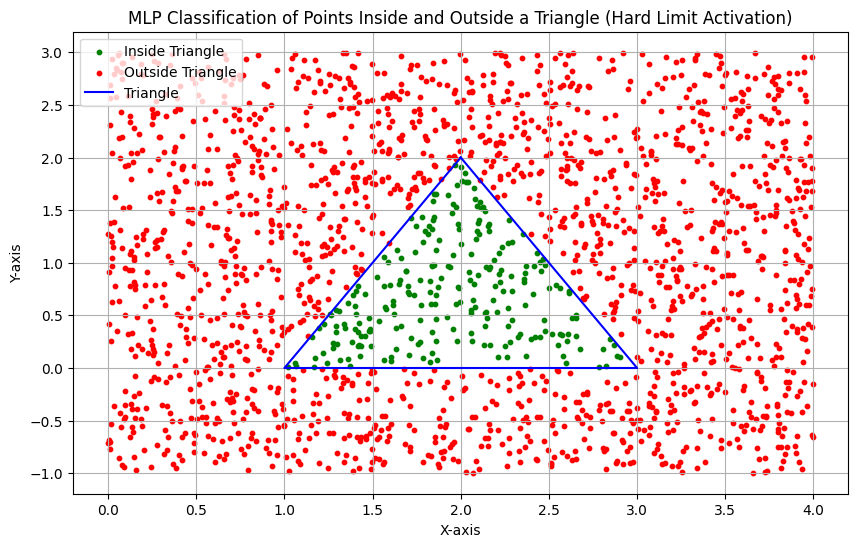

In [ ]:
from tensorflow.keras.layers import Activation
from tensorflow.keras import backend as K

# Define the hard limit activation function
def hard_lim(x):
    return K.cast(K.greater_equal(x, 0), dtype='float32')

# Define a custom layer to apply the hard limit activation
class HardLimActivation(tf.keras.layers.Layer):
    def call(self, inputs):
        return hard_lim(inputs)

# Define the MLP model
def create_custom_mlp():
    model = Sequential()

    # First hidden layer with 3 neurons
    model.add(Dense(3, input_dim=2, use_bias=True))
    model.add(HardLimActivation())  # Apply hard limit activation

    # Output layer with 1 neuron
    model.add(Dense(1, use_bias=True))
    model.add(HardLimActivation())  # Apply hard limit activation

    return model

# Create the model
model = create_custom_mlp()

# Manually set weights and biases for the first hidden layer
weights_hidden = np.array([
    [2, -1],   # Line AB (example coefficients)
    [-2, -1],  # Line BC (example coefficients)
    [0, 1]    # Line CA (example coefficients)
])

biases_hidden = np.array([-2, +6, 0])  # Adjust as per triangle side equations

# Ensure the weights and biases match the expected format
model.layers[0].set_weights([weights_hidden.T, biases_hidden])

# Manually set weights and biases for the output layer
# Ensure all neurons in the hidden layer must output > 0 for the final neuron to activate
weights_output = np.array([[1], [1], [1]])  # All hidden neurons contribute positively
biases_output = np.array([-2.5])  # Adjust threshold so all 3 neurons must fire to classify as inside

model.layers[2].set_weights([weights_output, biases_output])

# Generate random data points
num_points = 2000
x_values = np.random.uniform(0, 4, num_points)  # Updated x-axis limits
y_values = np.random.uniform(-1, 3, num_points)  # Updated y-axis limits

x_test = np.column_stack((x_values, y_values))

# Predict using the model
predictions = model.predict(x_test)

# Classify points as inside or outside
inside_triangle = x_test[predictions.flatten() > 0.5]
outside_triangle = x_test[predictions.flatten() <= 0.5]

# Plot the classified points and the triangle
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot inside points
plt.scatter(inside_triangle[:, 0], inside_triangle[:, 1], color='green', label='Inside Triangle', s=10)

# Plot outside points
plt.scatter(outside_triangle[:, 0], outside_triangle[:, 1], color='red', label='Outside Triangle', s=10)

# Plot triangle edges
triangle_vertices = np.array([[2, 2], [3, 0], [1, 0], [2, 2]])
plt.plot(triangle_vertices[:, 0], triangle_vertices[:, 1], color='blue', label='Triangle')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('MLP Classification of Points Inside and Outside a Triangle (Hard Limit Activation)')
plt.legend()
plt.grid()
plt.show()
